In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # data Cleaning

In [2]:
df1_1 = pd.read_csv("fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)
df1_2 = pd.read_csv("fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)
df = pd.concat([df1_1,df1_2])

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
is_fraud_ori = df[df["is_fraud"]==0]

In [5]:
is_fraud_ori.groupby(["first","last","dob"]).count()

trans_date_trans_time  cc_num  merchant  \
first   last     dob                                                   
Aaron   Murray   1974-12-23                   2912    2912      2912   
        Pena     1950-11-27                   2184    2184      2184   
        Rogers   1945-03-15                    729     729       729   
        Stewart  1995-04-22                    729     729       729   
Adam    Keller   1932-09-17                    729     729       729   
...                                            ...     ...       ...   
William Thompson 1937-03-17                   2915    2915      2915   
Willie  Jordan   1957-08-08                   1459    1459      1459   
Xavier  Beltran  1984-06-04                   2184    2184      2184   
Zachary Allen    1969-07-24                   2188    2188      2188   
        Boone    1927-12-11                    728     728       728   

                             category   amt  gender  street  city  state  \
first   last     dob                                                       
Aaron   Murray   1974-12-23      2912  2912    2912    2912  2912   2912   
        Pena     1950-11-27      2184  2184    2184    2184  2184   2184   
        Rogers   1945-03-15       729   729     729     729   729    729   
        Stewart  1995-04-22       729   729     729     729   729    729   
Adam    Keller   1932-09-17       729   729     729     729   729    729   
...                               ...   ...     ...     ...   ...    ...   
William Thompson 1937-03-17      2915  2915    2915    2915  2915   2915   
Willie  Jordan   1957-08-08      1459  1459    1459    1459  1459   1459   
Xavier  Beltran  1984-06-04      2184  2184    2184    2184  2184   2184   
Zachary Allen    1969-07-24      2188  2188    2188    2188  2188   2188   
        Boone    1927-12-11       728   728     728     728   728    728   

                              zip   lat  long  city_pop   job  trans_num  \
first   last     dob                                                       
Aaron   Murray   1974-12-23  2912  2912  2912      2912  2912       2912   
        Pena     1950-11-27  2184  2184  2184      2184  2184       2184   
        Rogers   1945-03-15   729   729   729       729   729        729   
        Stewart  1995-04-22   729   729   729       729   729        729   
Adam    Keller   1932-09-17   729   729   729       729   729        729   
...                           ...   ...   ...       ...   ...        ...   
William Thompson 1937-03-17  2915  2915  2915      2915  2915       2915   
Willie  Jordan   1957-08-08  1459  1459  1459      1459  1459       1459   
Xavier  Beltran  1984-06-04  2184  2184  2184      2184  2184       2184   
Zachary Allen    1969-07-24  2188  2188  2188      2188  2188       2188   
        Boone    1927-12-11   728   728   728       728   728        728   

                             unix_time  merch_lat  merch_long  is_fraud  
first   last     dob                                                     
Aaron   Murray   1974-12-23       2912       2912        2912      2912  
        Pena     1950-11-27       2184       2184        2184      2184  
        Rogers   1945-03-15        729        729         729       729  
        Stewart  1995-04-22        729        729         729       729  
Adam    Keller   1932-09-17        729        729         729       729  
...                                ...        ...         ...       ...  
William Thompson 1937-03-17       2915       2915        2915      2915  
Willie  Jordan   1957-08-08       1459       1459        1459      1459  
Xavier  Beltran  1984-06-04       2184       2184        2184      2184  
Zachary Allen    1969-07-24       2188       2188        2188      2188  
        Boone    1927-12-11        728        728         728       728  

[908 rows x 19 columns]

In [6]:
df["month"] = pd.DatetimeIndex(df["trans_date_trans_time"]).month
df["year"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year

#another way to extract
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

In [7]:
# check nums of rows and columns
df.shape

(1852394, 28)

In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [9]:
# check null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
month                    0
year                     0
hour                     0
day_of_week              0
year_month               0
age                      0
dtype: int64

In [10]:
# check duplicates
sum(df.duplicated())

0

In [11]:
# make a copy of df and drop useless columns for eda 
df_copy = df.copy() 
df.drop(["cc_num","zip","lat","long","unix_time","merch_lat","merch_long","trans_num"],axis=1,inplace=True)

In [12]:
df.head(5)

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud,month,year,hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,1,2019,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,1,2019,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,1,2019,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,1,2019,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,1,2019,0,Tuesday,2019-01,33.0


In [13]:
# descriptive statistics of the original table 
# also check outlier, but these outliers are meaningful
stats = df.describe().transpose()
stats['outlier_max'] = stats['mean'] + 3*stats['std']
stats['outlier_min'] = stats['mean'] - 3*stats['std']
stats.loc[stats['min'] < stats['outlier_min'], 'has_outlier'] = 1
stats.loc[stats['max'] > stats['outlier_max'], 'has_outlier'] = 1
stats = stats.drop(["count"],axis=1)
stats

,mean,std,min,25%,50%,75%,max,outlier_max,outlier_min,has_outlier
amt,70.063567,159.253975,1.0,9.64,47.45,83.1,28948.9,547.825492,-407.698357,1.0
city_pop,88643.674509,301487.618344,23.0,741.00,2443.00,20328.0,2906700.0,993106.529540,-815819.180521,1.0
is_fraud,0.005210,0.071992,0.0,0.00,0.00,0.0,1.0,0.221187,-0.210767,1.0
month,7.152067,3.424954,1.0,4.00,7.00,10.0,12.0,17.426929,-3.122795,NaN
year,2019.500727,0.500000,2019.0,2019.00,2020.00,2020.0,2020.0,2021.000726,2018.000728,NaN
hour,12.806119,6.815753,0.0,7.00,14.00,19.0,23.0,33.253378,-7.641140,NaN
age,46.266173,17.412388,14.0,33.00,44.00,57.0,96.0,98.503335,-5.970990,NaN


# EDA

## Transaction overall

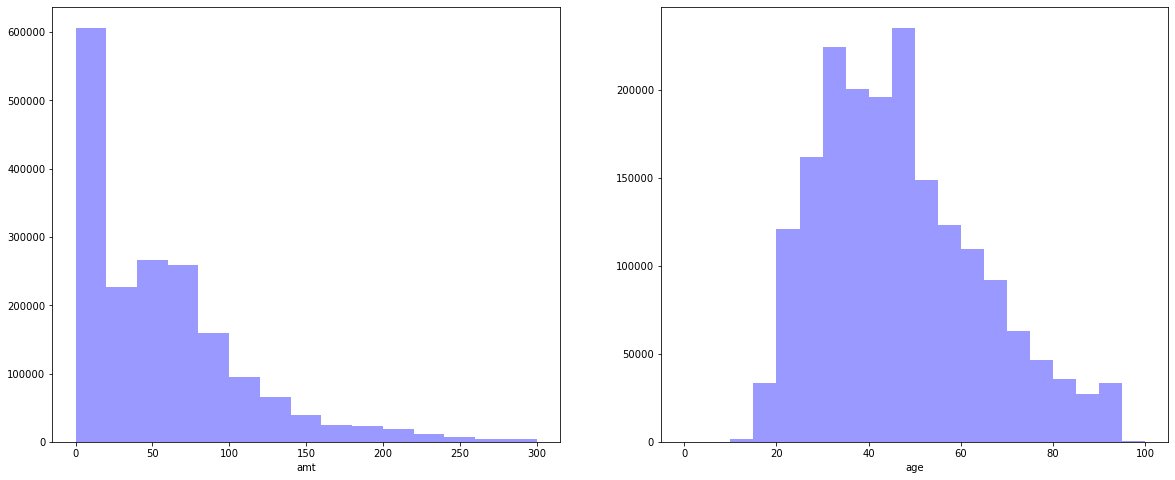

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['amt'],color="blue",bins=np.arange(0,301,20),kde=False);

plt.subplot(1,2,2)
sns.distplot(df['age'],color="blue",bins=np.arange(0,101,5),kde=False);

In [15]:
len(df.query("is_fraud == 1"))

9651

In [16]:
np.mean(df["amt"]) / len(df.query("is_fraud == 1"))

0.007259721010816063

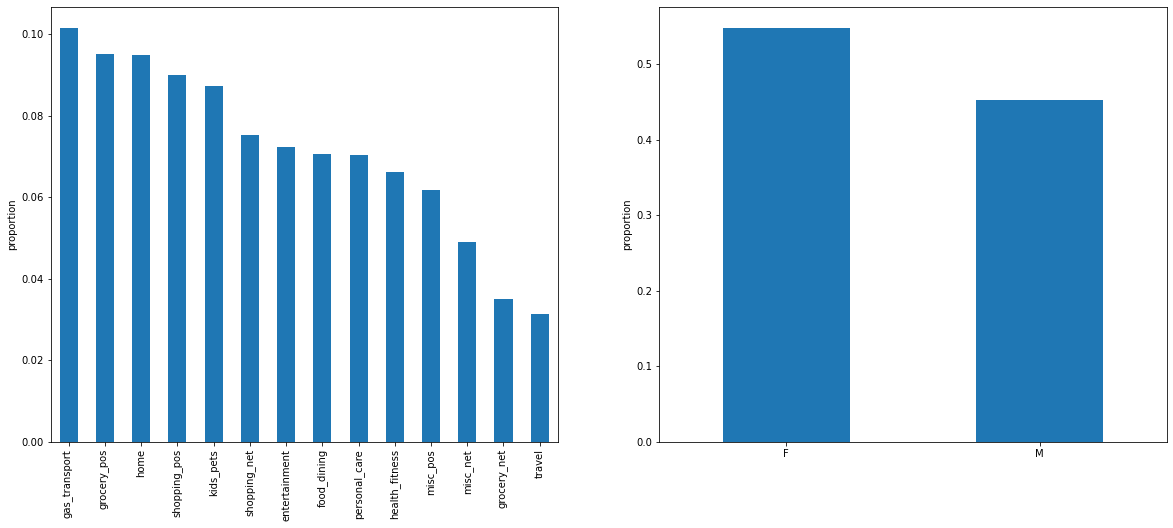

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts(normalize=True).plot.bar();
plt.ylabel('proportion');

plt.subplot(1,2,2)
df['gender'].value_counts(normalize=True).plot.bar();
plt.xticks(rotation=0);
plt.ylabel('proportion');

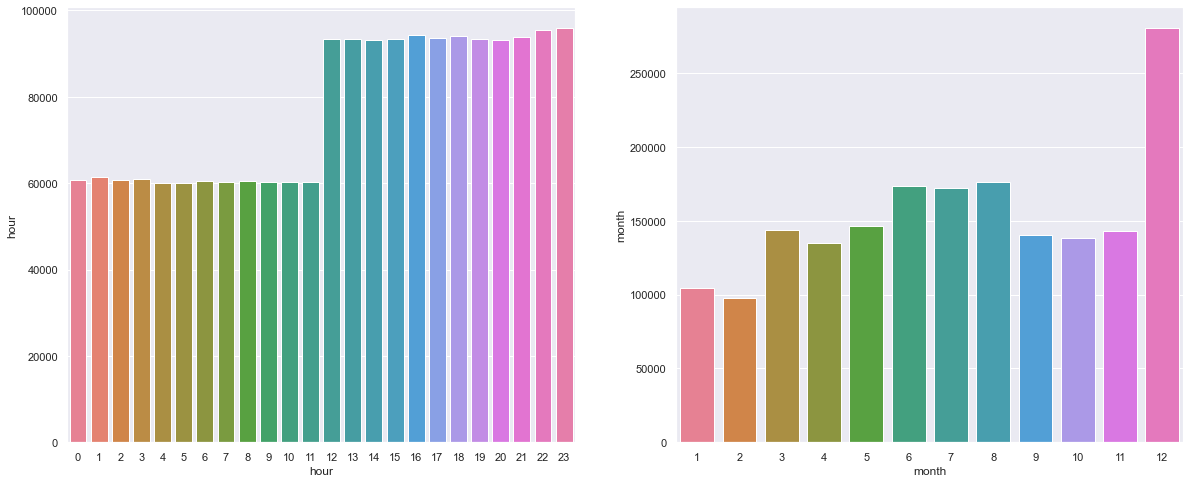

In [18]:
plt.figure(figsize=(20,8))
sns.set()
plt.subplot(1,2,1)
plt.xlabel('hour')
plt.ylabel('transactions')
sns.barplot(df["hour"].value_counts().index,df["hour"].value_counts(),palette="husl");

sns.set()
plt.subplot(1,2,2)
plt.xlabel('month')
plt.ylabel('transactions')
sns.barplot(df["month"].value_counts().index,df["month"].value_counts(),palette="husl");

In [19]:
df.state.value_counts(normalize=True)

TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: state, dtype: float64

## Fraud vs Not-Fraud (sample non-fraud to get same size)

In [14]:
print("Value distribution:")
print(df["is_fraud"].value_counts())
print('\n')
print("Proportion distribution:")
print(df["is_fraud"].value_counts(normalize=True))

Value distribution:
0    1842743
1       9651
Name: is_fraud, dtype: int64


Proportion distribution:
0    0.99479
1    0.00521
Name: is_fraud, dtype: float64


In [15]:
fraud = df[df["is_fraud"] == 1]
not_fraud = df[df["is_fraud"]==0]

# create a sample dataset of not-fraud with the same size as fraud dataset
sample_not_fraud = not_fraud.sample(n = len(fraud))


# concat them together as half fraud and half not-fraud for stacked plot 
df_halfhalf = pd.concat([fraud,sample_not_fraud])

In [16]:
fraud

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud,month,year,hour,day_of_week,year_month,age
2449,2019-01-02 01:06:37,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,885,Soil scientist,1988-09-15,1,1,2019,1,Wednesday,2019-01,30.0
2472,2019-01-02 01:47:29,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,1595797,Horticultural consultant,1960-10-28,1,1,2019,1,Wednesday,2019-01,58.0
2523,2019-01-02 03:05:23,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,1595797,Horticultural consultant,1960-10-28,1,1,2019,3,Wednesday,2019-01,58.0
2546,2019-01-02 03:38:03,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,885,Soil scientist,1988-09-15,1,1,2019,3,Wednesday,2019-01,30.0
2553,2019-01-02 03:55:47,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,1595797,Horticultural consultant,1960-10-28,1,1,2019,3,Wednesday,2019-01,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22 22:05:48,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,14462,Database administrator,1959-03-03,1,12,2020,22,Tuesday,2020-12,62.0
517274,2020-12-22 22:18:07,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,14462,Database administrator,1959-03-03,1,12,2020,22,Tuesday,2020-12,62.0
517341,2020-12-22 22:31:48,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,14462,Database administrator,1959-03-03,1,12,2020,22,Tuesday,2020-12,62.0
517529,2020-12-22 23:06:03,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,14462,Database administrator,1959-03-03,1,12,2020,23,Tuesday,2020-12,62.0


In [17]:
not_fraud

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud,month,year,hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,1,2019,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,1,2019,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,1,2019,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,1,2019,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,1,2019,0,Tuesday,2019-01,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,519,Town planner,1966-02-13,0,12,2020,23,Thursday,2020-12,55.0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,28739,Futures trader,1999-12-27,0,12,2020,23,Thursday,2020-12,21.0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,3684,Musician,1981-11-29,0,12,2020,23,Thursday,2020-12,39.0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,129,Cartographer,1965-12-15,0,12,2020,23,Thursday,2020-12,55.0


In [18]:
bins = np.arange(0,1300,25)

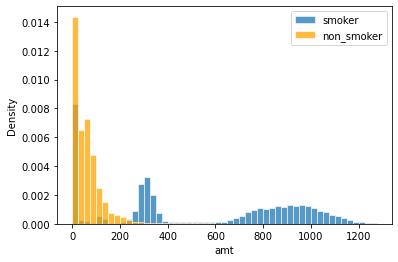

In [19]:
# density
sns.histplot(fraud.amt, bins=bins, stat='density', label='smoker', ec='w');
sns.histplot(not_fraud.amt, bins=bins, stat='density', label='non_smoker', color='orange', ec='w');
plt.legend();

In [50]:
df

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,city_pop,job,dob,is_fraud,month,year,hour,day_of_week,year_month,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,1,2019,0,Tuesday,2019-01,31.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,1,2019,0,Tuesday,2019-01,41.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,1,2019,0,Tuesday,2019-01,57.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,1,2019,0,Tuesday,2019-01,52.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,1,2019,0,Tuesday,2019-01,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,519,Town planner,1966-02-13,0,12,2020,23,Thursday,2020-12,55.0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,28739,Futures trader,1999-12-27,0,12,2020,23,Thursday,2020-12,21.0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,3684,Musician,1981-11-29,0,12,2020,23,Thursday,2020-12,39.0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,129,Cartographer,1965-12-15,0,12,2020,23,Thursday,2020-12,55.0


In [51]:
np.mean(not_fraud.groupby(["first","last"]).count()["category"])

2045.219755826859

In [52]:
np.mean(fraud.groupby(["first","last"]).count()["category"])

9.980351602895553

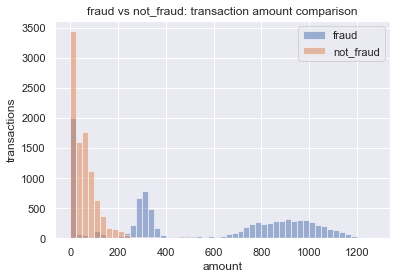

In [53]:
from matplotlib import pyplot
from random import sample
bins = np.arange(0,1300,25)
pyplot.hist(list(fraud.amt), bins, alpha=0.5, label='fraud')
pyplot.hist(list(sample_not_fraud.amt), bins, alpha=0.5, label='not_fraud')
pyplot.legend(loc='upper right')
pyplot.xlabel("amount")
pyplot.ylabel("transactions")
pyplot.title("fraud vs not_fraud: transaction amount comparison")
pyplot.show()

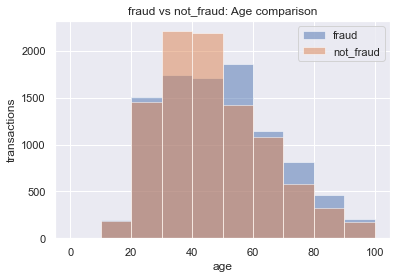

In [54]:
## same but compare by using a overlapping histogram
from matplotlib import pyplot
from random import sample
bins = np.arange(0,101,10)
pyplot.hist(list(fraud.age), bins, alpha=0.5, label='fraud')
pyplot.hist(list(sample_not_fraud.age), bins, alpha=0.5, label='not_fraud')
pyplot.legend(loc='upper right')
pyplot.xlabel("age")
pyplot.ylabel("transactions")
pyplot.title("fraud vs not_fraud: Age comparison")
pyplot.show()

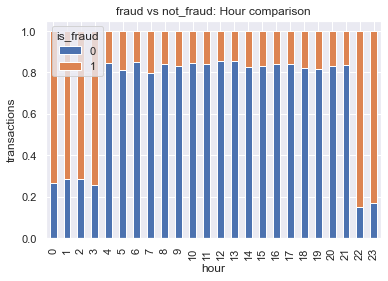

In [24]:
# stacked barplot to compare fraud vs not-fraud by hour
table = pd.crosstab(df_halfhalf.hour,df_halfhalf.is_fraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('fraud vs not_fraud: Hour comparison')
plt.xlabel('hour')
plt.ylabel('transactions');

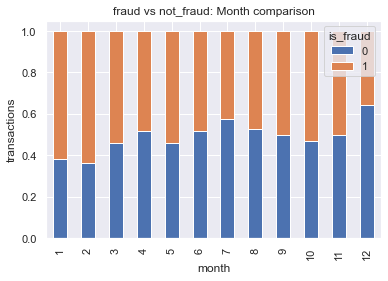

In [25]:
# stacked barplot to compare fraud vs not-fraud by month
table = pd.crosstab(df_halfhalf.month,df_halfhalf.is_fraud)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('fraud vs not_fraud: Month comparison')
plt.xlabel('month')
plt.ylabel('transactions');

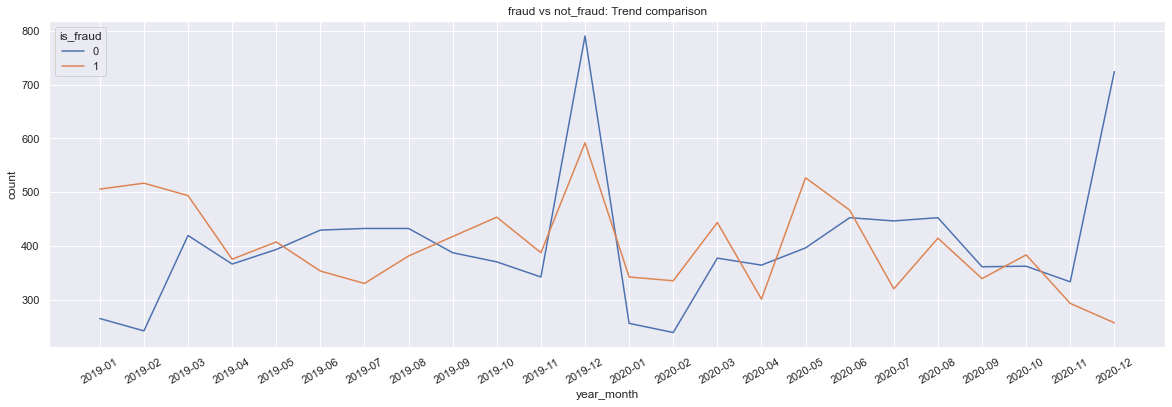

In [26]:
year_month_list = ['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
df_halfhalf["count"]=1
hehe = df_halfhalf.groupby(["year_month","is_fraud"]).count().reset_index()
hehe = hehe[["year_month","is_fraud","count"]]
hehe["year_month"] = hehe["year_month"].astype(str)
plt.figure(figsize=(20,6))
sns.lineplot(data=hehe,x="year_month",y="count",hue="is_fraud");
plt.title("fraud vs not_fraud: Trend comparison")
plt.xticks(rotation=30);

## One hot encoding

In [20]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [21]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [22]:
df1.head()

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0,0,0,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,0,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,0,0,0,1,0,0,0,0,1,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,0,0,0,1,0,0,0,0,1,0


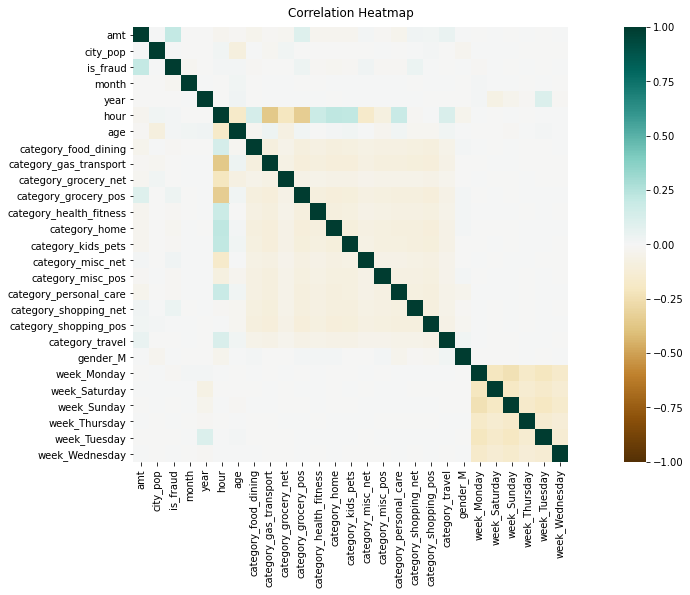

In [23]:
plt.figure(figsize=(20,8));
corr_heatmap = sns.heatmap(df1.corr(),vmin=-1, vmax=1,cmap='BrBG',square=True);
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

## oversampling

In [24]:
X_cols = ['amt','city_pop', 'hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday'] 

Y_cols = ['is_fraud']

## train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[X_cols],df1[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [26]:
train = pd.concat([X_train,y_train],axis=1)
train

,amt,city_pop,hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_shopping_pos,category_travel,gender_M,week_Monday,week_Tuesday,week_Wednesday,week_Thursday,week_Saturday,week_Sunday,is_fraud
45035,25.69,5895,18,45.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
532137,93.85,255,9,48.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
828776,8.21,156391,9,52.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
324166,66.95,93193,5,26.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
526588,2.60,2121,1,46.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2.33,5438,6,54.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
117739,9.12,1686,20,34.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
131932,118.27,310,21,40.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
671155,5.60,140,9,78.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [27]:
(1296675 - 1289962) *10/7

9590.0

In [28]:
cnt_non_fraud = train[train['is_fraud'] == 0]['amt'].count()
train_class_fraud = train[train['is_fraud'] == 1]
train_class_nonfraud = train[train['is_fraud'] == 0]

train_class_fraud_oversample = train_class_fraud.sample(cnt_non_fraud, replace=True)
train_oversampled = pd.concat([train_class_nonfraud, train_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(train_oversampled['is_fraud'].value_counts())

Random over-sampling:
0    1289962
1    1289962
Name: is_fraud, dtype: int64


In [29]:
X_train_oversampled = train_oversampled[X_cols]
y_train_oversampled = train_oversampled[Y_cols]

## logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_oversampled, y_train_oversampled)
y_train_pred = logreg.predict(X_train_oversampled)
y_test_pred = logreg.predict(X_test)
y_test_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
logreg.predict_proba(X_test)

array([[0.67934038, 0.32065962],
       [0.73556021, 0.26443979],
       [0.88219723, 0.11780277],
       ...,
       [0.64182287, 0.35817713],
       [0.81245298, 0.18754702],
       [0.63029115, 0.36970885]])

In [32]:
from collections import Counter
Counter(y_test_pred )

Counter({0: 509747, 1: 45972})

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
print(confusion_matrix(y_train_oversampled, y_train_pred))
print(classification_report(y_train_oversampled, y_train_pred))

[[1187004  102958]
 [ 326991  962971]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85   1289962
           1       0.90      0.75      0.82   1289962

    accuracy                           0.83   2579924
   macro avg       0.84      0.83      0.83   2579924
weighted avg       0.84      0.83      0.83   2579924



In [35]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[509013  43768]
 [   734   2204]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    552781
           1       0.05      0.75      0.09      2938

    accuracy                           0.92    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       0.99      0.92      0.95    555719



In [36]:
# create a ROC curve
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_pred,y_pred_proba)

In [39]:
y_test

,is_fraud
244469,0
434906,0
354659,0
197113,0
468148,0
...,...
147437,0
374075,0
153028,0
121903,0


In [42]:
y_pred_proba

array([0.32065962, 0.26443979, 0.11780277, ..., 0.35817713, 0.18754702,
       0.36970885])

In [50]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 244469 to 204408
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   is_fraud  555719 non-null  int64
dtypes: int64(1)
memory usage: 8.5 MB


In [52]:
y_pred_proba

array([0.32065962, 0.26443979, 0.11780277, ..., 0.35817713, 0.18754702,
       0.36970885])

In [57]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99965963, 1.        ,
       1.        ])

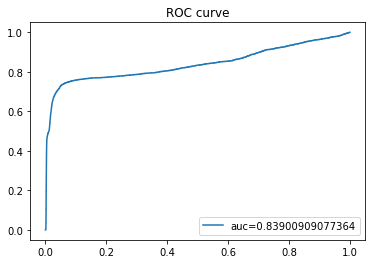

In [37]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve")
plt.show()

## decision tree

In [88]:
#Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train_oversampled , y_train_oversampled)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [89]:
print("Train Results")
pred_train = dt_clf.predict(X_train_oversampled)

print(confusion_matrix(y_train_oversampled, pred_train))
print(classification_report(y_train_oversampled, pred_train))

Train Results
[[1282684    7278]
 [      0 1289962]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289962
           1       0.99      1.00      1.00   1289962

    accuracy                           1.00   2579924
   macro avg       1.00      1.00      1.00   2579924
weighted avg       1.00      1.00      1.00   2579924



In [86]:
tn = 1281903
tp = 1289929
fp = 8008
fn = 0

In [87]:
sensitivity = recall = tp/(tp+fn)
precision = tp/(tp+fp)

print(sensitivity)
print(recall)
print(precision)

1.0
1.0
0.9938302090163081


In [90]:
print("decision tree Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

decision tree Test Results
[[549554   3227]
 [   285   2653]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552781
           1       0.45      0.90      0.60      2938

    accuracy                           0.99    555719
   macro avg       0.73      0.95      0.80    555719
weighted avg       1.00      0.99      0.99    555719



In [91]:
dt_clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [92]:
# create a ROC curve
from sklearn import metrics
y_pred_proba = dt_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

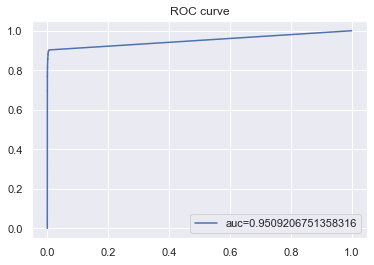

In [93]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve")
plt.show()

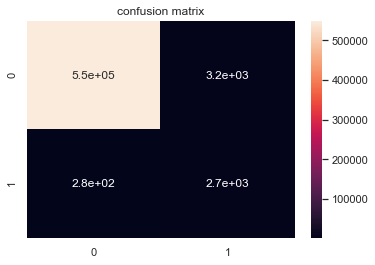

In [94]:
import seaborn as sns
abc = confusion_matrix(y_test, pred_test)
sns.heatmap(abc, annot=True);
plt.title("confusion matrix");

## random forest

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

In [97]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train_oversampled, y_train_oversampled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.7min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [99]:
print("Train Results")
pred_train = rf_clf.predict(X_train_oversampled)

print(confusion_matrix(y_train_oversampled, pred_train))
print(classification_report(y_train_oversampled, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.3s finished


[[1287647    2315]
 [      0 1289962]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289962
           1       1.00      1.00      1.00   1289962

    accuracy                           1.00   2579924
   macro avg       1.00      1.00      1.00   2579924
weighted avg       1.00      1.00      1.00   2579924



In [100]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished


[[551593   1188]
 [   337   2601]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.69      0.89      0.77      2938

    accuracy                           1.00    555719
   macro avg       0.84      0.94      0.89    555719
weighted avg       1.00      1.00      1.00    555719



In [101]:
X_train.columns

Index(['amt', 'city_pop', 'hour', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'week_Monday',
       'week_Tuesday', 'week_Wednesday', 'week_Thursday', 'week_Saturday',
       'week_Sunday'],
      dtype='object')

In [102]:
rf_clf.feature_importances_

array([0.58076184, 0.02738109, 0.18558511, 0.03379613, 0.00992418,
       0.0226552 , 0.007009  , 0.02573191, 0.00497392, 0.01051291,
       0.00695162, 0.01085687, 0.00747347, 0.00525623, 0.02808009,
       0.00995592, 0.0067329 , 0.00858345, 0.00170991, 0.00112003,
       0.00110364, 0.00118151, 0.00120896, 0.00145411])

In [103]:
data_feature = pd.DataFrame({"feature":X_train.columns,"feature_importance":rf_clf.feature_importances_}).sort_values("feature_importance",ascending=False).head(5)

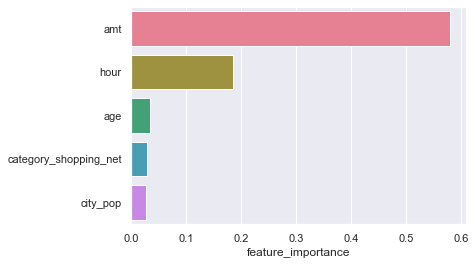

In [104]:
sns.barplot(x="feature_importance",y="feature",data=data_feature,palette="husl");
plt.ylabel("");

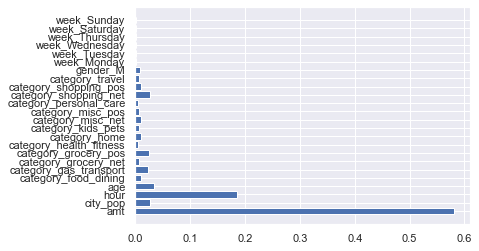

In [105]:
plt.barh(X_train.columns, rf_clf.feature_importances_);

In [62]:
model_list = ["random forest","decision tree","logistic regression"]

In [63]:
accuracy_list = [1,1,0.83]
auc = [1,1,0.84]

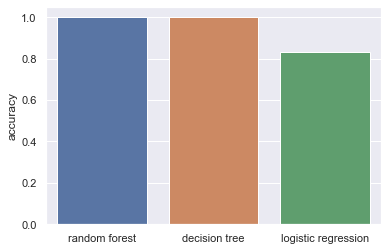

In [64]:
sns.barplot(x=model_list, y=accuracy_list);
plt.ylabel("accuracy");

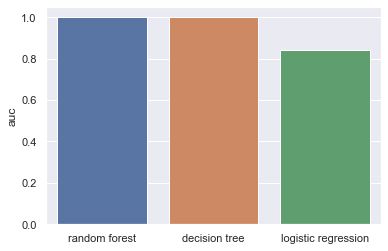

In [65]:
sns.barplot(x=model_list, y=auc);
plt.ylabel("auc");